# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo



In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

BAC = data.DataReader(name='BAC', data_source='yahoo', start=start, end=end)
C = data.DataReader(name='C', data_source='yahoo', start=start, end=end)
GS = data.DataReader(name='GS', data_source='yahoo', start=start, end=end)
JPM = data.DataReader(name='JPM', data_source='yahoo', start=start, end=end)
MS = data.DataReader(name='MS', data_source='yahoo', start=start, end=end)
WFC = data.DataReader(name='WFC', data_source='yahoo', start=start, end=end)

In [3]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584068
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227390
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270206
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220276
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241673


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584068   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227390   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270206   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220276   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241673   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.224957  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.249130  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.345787  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.382023  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.756573  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242821  
2006-01-04  31.530001  10870000.0  20.008032  
2006-01-05  31.495001  10158000.0  19.985817  
2006-01-06  31.680000   8403800.0  20.103212  
2006-01-09  31.674999   5619600.0  20.100046  

[5 rows x 36 columns]

** Set the column name levels:**

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584068  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227390  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270206  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220276  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241673  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224957  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249130  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345787  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382023  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756573  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242821  
2006-01-04   31.799999  31.530001  10870000.0  20.008032  
2006-01-05   31.500000  31.495001  10158000.0  19.985817  
2006-01-06   31.580000  31.680000   8403800.0  20.103212  
2006-01-09   31.674999  31.674999   5619600.0  20.100046  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close', axis=1, level=1)   # xs: Return cross-section from the Series/DataFrame,
                                           # This method takes a key argument to select data at a particular level of a MultiIndex
# Or
bank_stocks.xs(key='Close', axis=1, level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


In [9]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [10]:
# returns = pd.DataFrame(index=bank_stocks.index, columns=['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return'])
# bank_stocks_close = bank_stocks.xs('Close', axis=1, level=1)
# for i in range(1, len(returns.index)):
#     for j in range(len(returns.columns)):
#         returns.iloc[i].iloc[j] = (bank_stocks_close.iloc[i].iloc[j]/bank_stocks_close.iloc[i-1].iloc[j]) - 1

# Or
# Much Better
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

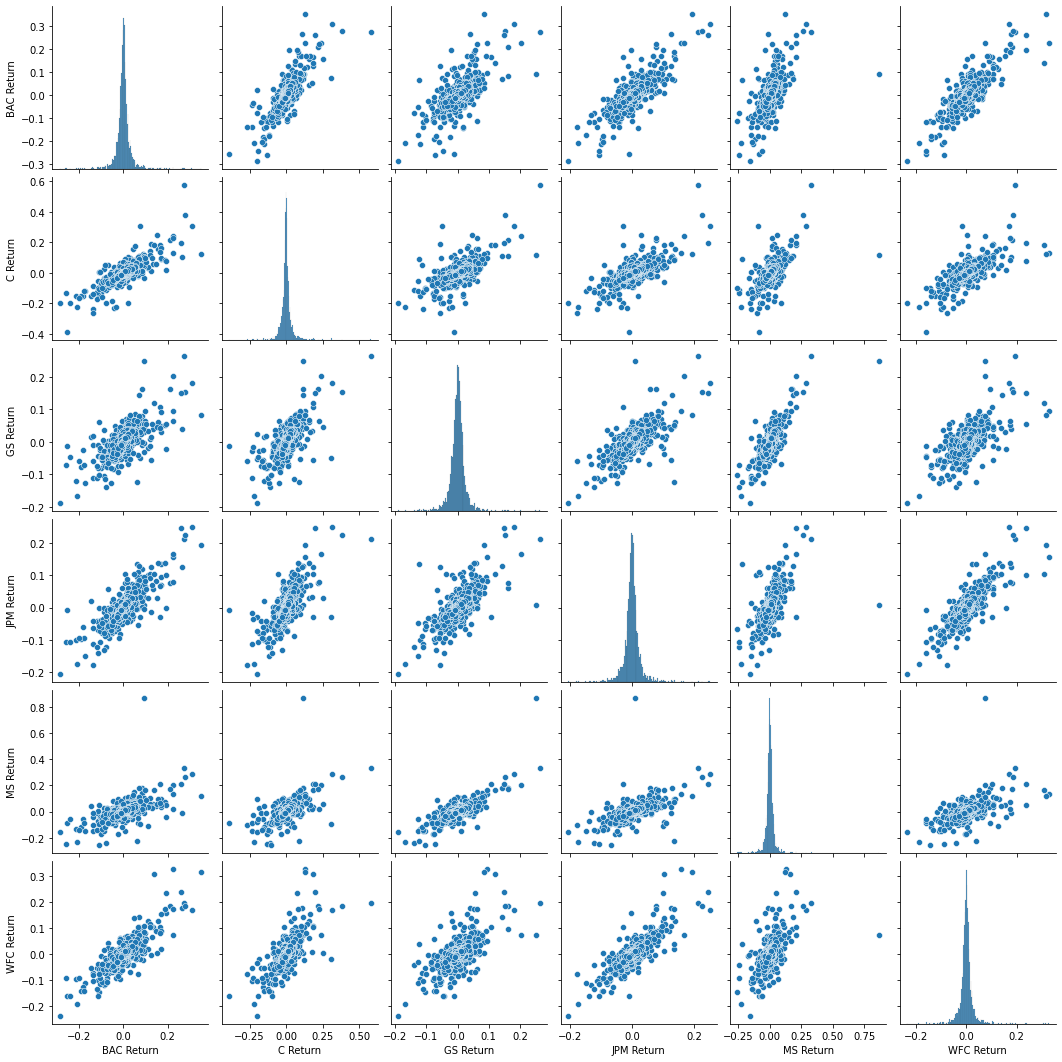

In [11]:
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [14]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [15]:
returns[returns.index.year == 2015].std()
# Or
returns.loc['2015-1-1':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

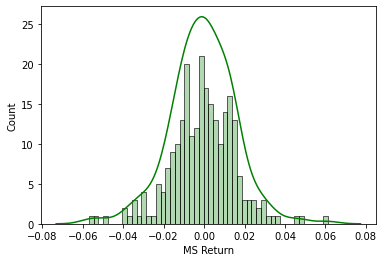

In [16]:
sns.histplot(returns['MS Return'].loc['2015-1-1':'2015-12-31'], color='green', alpha=0.3, bins=50)
sns.kdeplot(returns['MS Return'].loc['2015-1-1':'2015-12-31'], color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Return', ylabel='Count'>

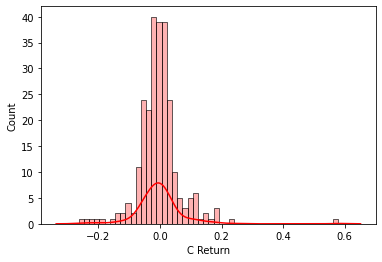

In [17]:
sns.histplot(returns['C Return'].loc['2008-1-1':'2008-12-31'], color='red', alpha=0.3, bins=50)
sns.kdeplot(returns['C Return'].loc['2008-1-1':'2008-12-31'], color='red')

____
# More Visualization



### Imports

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

plt.style.use('ggplot')

** Create a line plot showing Close price for each bank for the entire index of time. **

<AxesSubplot:xlabel='Date'>

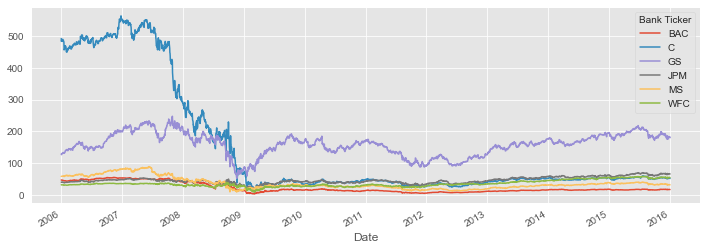

In [19]:
bank_stocks.xs('Close', axis=1, level='Stock Info').plot(figsize=(12,4))

In [20]:
bank_stocks.xs('Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

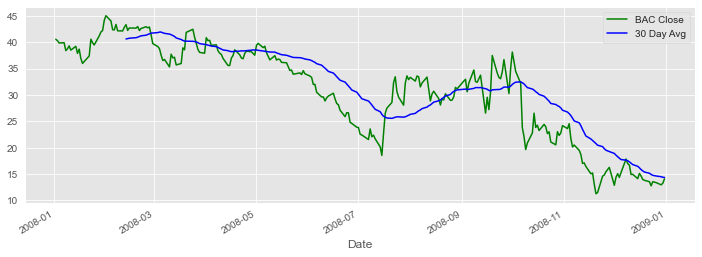

In [41]:
plt.figure(figsize=(12,4))
bank_stocks.xs('Close', axis=1, level='Stock Info')['BAC'].loc['2008-1-1':'2008-12-31'].plot(color='green', label='BAC Close')
bank_stocks.xs('Close', axis=1, level='Stock Info')['BAC'].loc['2008-1-1':'2008-12-31'].rolling(window=30).mean().plot(color='blue', label='30 Day Avg')
plt.legend(loc=0)

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

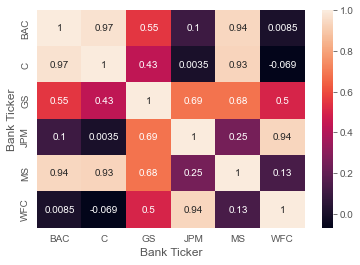

In [49]:
sns.heatmap(bank_stocks.xs('Close', axis=1, level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

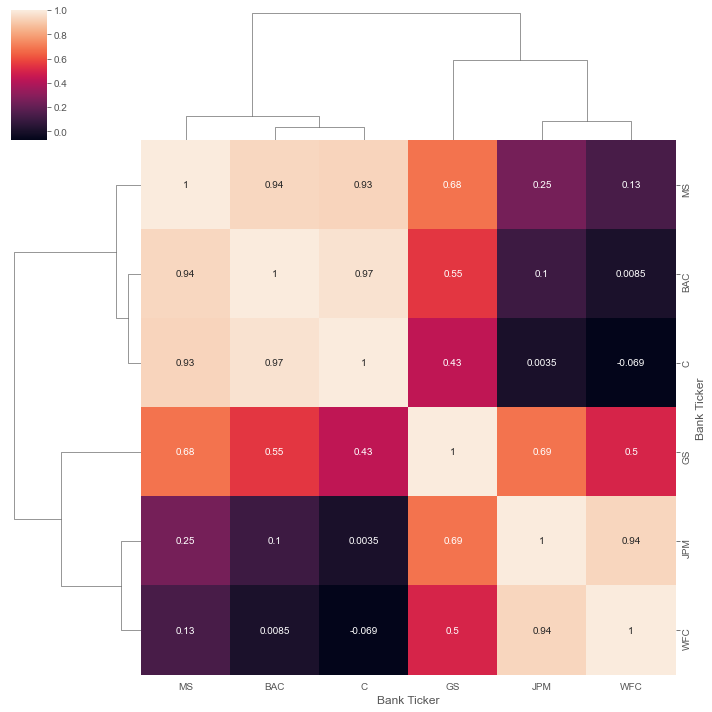

In [51]:
sns.clustermap(bank_stocks.xs('Close', axis=1, level='Stock Info').corr(), annot=True)

In [55]:
bank_stocks.xs('Close', axis=1, level='Stock Info').corr().iplot(kind='heatmap', colorscale='rdylbu')

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [62]:
BAC.loc['2015-1-1':'2015-12-31'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [59]:
MS['Close'].loc['2015-1-1':'2015-12-31'].ta_plot(study='sma')

In [63]:
MS['Close'].loc['2015-1-1':'2015-12-31'].ta_plot(study='sma', periods=[13, 21, 55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [61]:
BAC['Close'].loc['2015-1-1':'2015-12-31'].ta_plot(study='boll')